In [ ]:
!pip install pyLDAvis
!pip install WordCloud

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from src import lda_utils, nlp_utils, web_app_utils
from src.process_text_variables import contracted_words_dict, stop_words_dict, punc 

import nltk
from nltk.corpus import stopwords

from datetime import datetime

#nltk.download('wordnet')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

# LDA - Wall Street Market

## Import Dataset and LDA Model Inputs

In [2]:
wallstreet = pd.read_csv('data/wallstreet_master.csv')
wallstreet['lemmatized_tokens'] = wallstreet['contentWithHTMLTag'].apply(lambda x: nlp_utils.process_text(x, contracted_words_dict, punc, stop_words_dict, min_len=1))

C:\Users\morga\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
wallstreet.head

In [3]:
n_topics = 20
max_doc_freq = 0.7
max_feats = 10000
max_iterations = 25

docs_raw = [' '.join(d) for d in wallstreet['lemmatized_tokens']]

C:\Users\morga\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


--- 
# Bag of Words

In [4]:
# Must be even for visualizations.

lda_output_bow, lda_model_bow, docs_vectorized_bow, vect_bow = lda_utils.convert_to_bow_and_fit_lda_model(docs_raw, max_feats, max_doc_freq, n_topics, 'batch', max_iterations, 3)

sorted_components = np.argsort(lda_model_bow.components_, axis=1)[:, ::-1]
feat_names = np.array(vect_bow.get_feature_names())

C:\Users\morga\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\morga\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


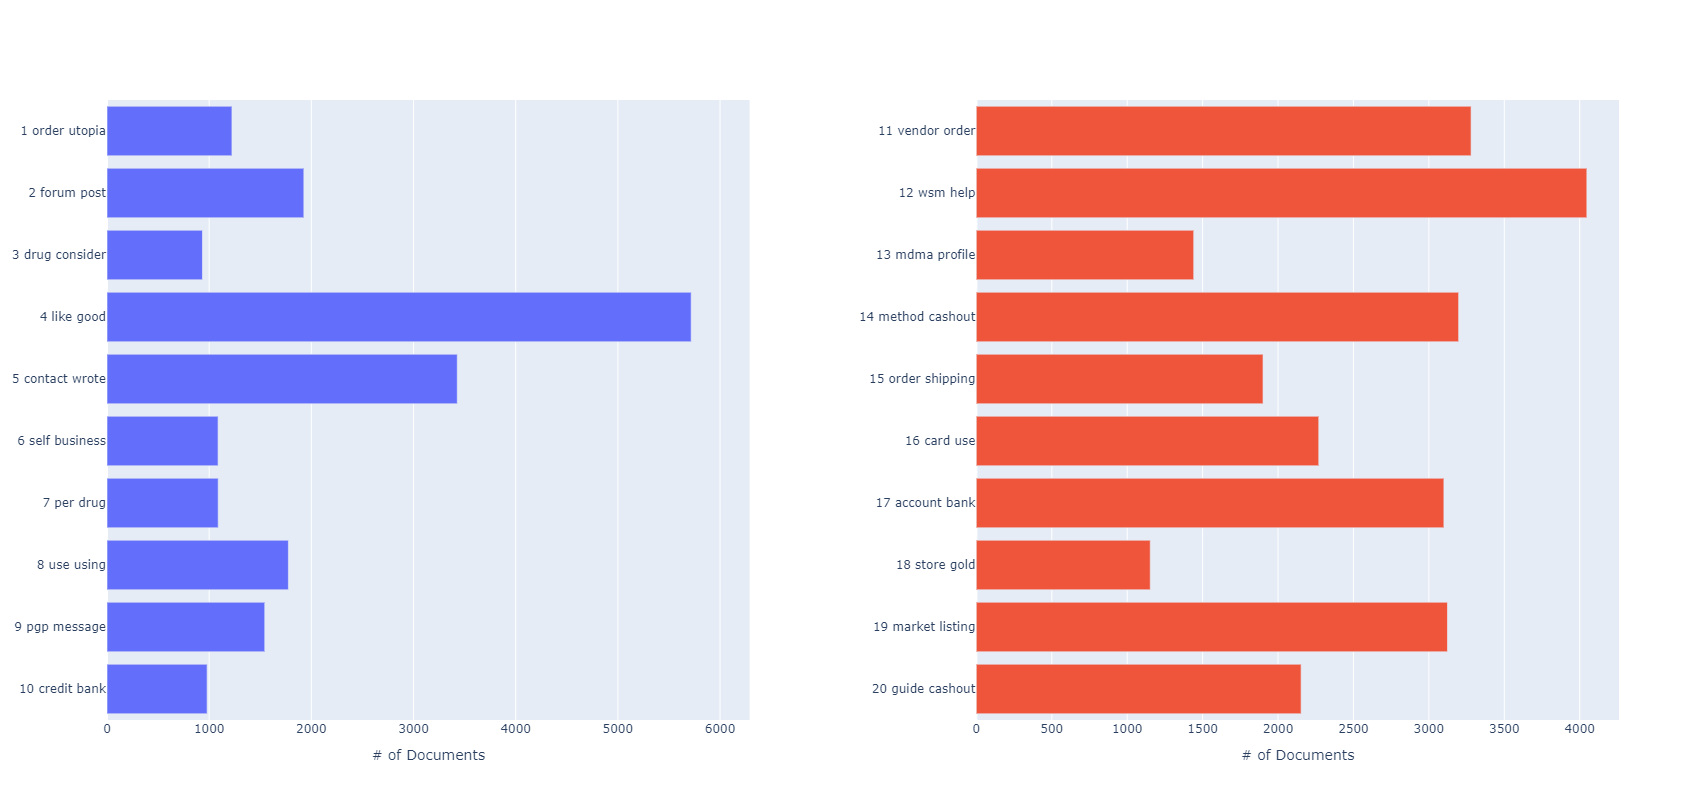

In [5]:
web_app_utils.plot_lda_components_distribution(lda_model_bow, vect_bow, lda_output_bow, n_topics)

In [6]:
lda_utils.print_topics(lda_model_bow, vect_bow, 10)


Topic #0:
order utopia quality kush refund best product reship weed price

Topic #1:
forum post way deal wrote free people become like thread

Topic #2:
drug consider ice arab sand nun smashed testicle eskimo name

Topic #3:
like good know one time wrote really make people vendor

Topic #4:
contact wrote allowed external link market read know pm rule

Topic #5:
self business service online need line po marketplace may mg

Topic #6:
per drug site porn the world high make video lifetime

Topic #7:
use using tor key file address click user tail server

Topic #8:
pgp message signature begin key end signed hash public vendor

Topic #9:
credit bank visa id license passport picsou fake driver scan

Topic #10:
vendor order market support wrote dispute escrow btc wallet ticket

Topic #11:
wsm help rule phished wrote vendor profile account external link

Topic #12:
mdma profile cocaine gram weed sample coke hash quality market

Topic #13:
method cashout day bank fraud chat one guide room log

T

C:\Users\morga\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\morga\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



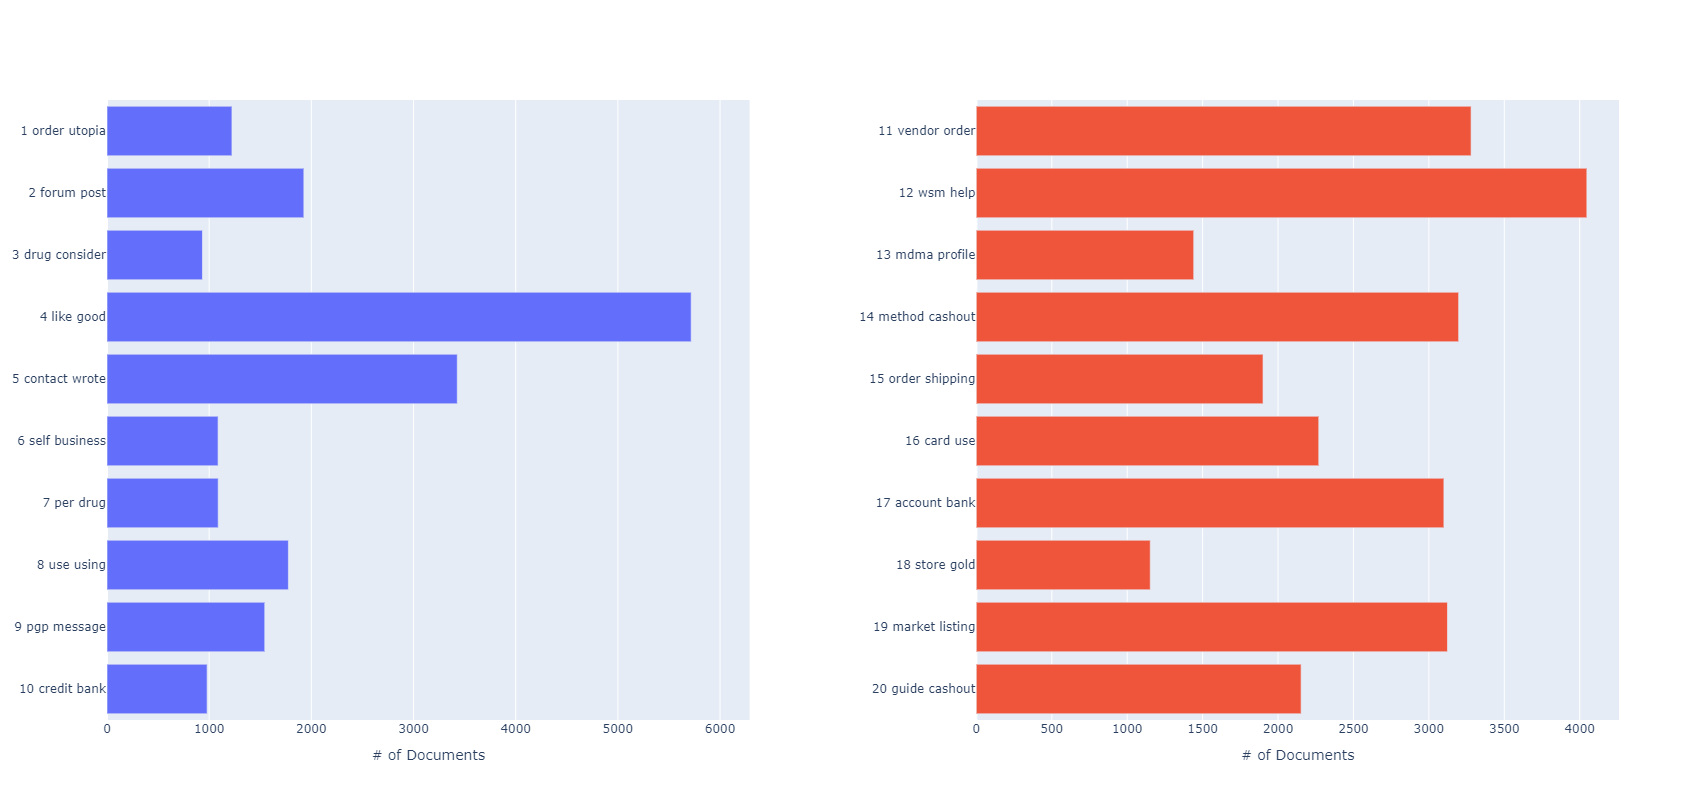

In [7]:
web_app_utils.plot_lda_components_distribution(lda_model_bow, vect_bow, lda_output_bow, n_topics)

In [8]:
# Topic order is based on topic popularity.
# The distance b/t circles reprsents an approximation topic similarity. It's approximation b/c only a 2D map.
# When lambda = 0, the bar chart solely show topic-specific terms (jargon).
doc_term_matrix = np.matrix(lda_model_bow.components_)
fig_lda_bow = pyLDAvis.sklearn.prepare(lda_model_bow, doc_term_matrix, vect_bow)

C:\Users\morga\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.054579  0.171337       1        1  16.451978
7      0.111906  0.135696       2        1   7.321178
13    -0.010419  0.138573       3        1   6.896579
10    -0.039827  0.148094       4        1   6.591212
16     0.062979  0.058616       5        1   6.324344
18    -0.029436 -0.026602       6        1   5.906860
19    -0.015717 -0.033675       7        1   5.708069
15     0.109622  0.076235       8        1   5.640279
14     0.095785 -0.063382       9        1   4.463020
0      0.045362 -0.228832      10        1   4.392070
11    -0.301131 -0.023286      11        1   4.257769
5      0.194165  0.032223      12        1   4.046122
6      0.189996  0.011743      13        1   4.023541
4     -0.224359  0.073315      14        1   3.947575
1     -0.031779  0.158427      15        1   3.556178
9      0.085327 -0.162583      16        1   2.400861
12    -0.047484 -0.219426      17        1   2.369927
8     -0.239560 -0.042660      18        1   2.292282
2      0.064624 -0.216134      19        1   1.797226
17    -0.074633  0.012321      20        1   1.612930, topic_info=       Term          Freq         Total Category  logprob  loglift
6465    pgp   5517.000000   5517.000000  Default  30.0000  30.0000
736    bank  12200.000000  12200.000000  Default  29.0000  29.0000
9861    wsm  10662.000000  10662.000000  Default  28.0000  28.0000
4051   help   8427.000000   8427.000000  Default  27.0000  27.0000
7590   rule   7284.000000   7284.000000  Default  26.0000  26.0000
...     ...           ...           ...      ...      ...      ...
9861    wsm    142.818934  10662.151606  Topic20  -5.1784  -0.1858
5272   mail    115.364739    915.528091  Topic20  -5.3918   2.0557
5863    new    131.785052   7089.528324  Topic20  -5.2588   0.1419
6058  offer    131.967716   8476.032332  Topic20  -5.2574  -0.0353
3774   good    117.693491   8528.054113  Topic20  -5.3718  -0.1559

[1487 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
12       19  0.987553          aber
18       18  0.919319  abloescobart
26        1  0.073487    absolutely
26        7  0.097450    absolutely
26        9  0.065499    absolutely
...     ...       ...           ...
9947      9  0.037846          your
9947     13  0.068811          your
9947     15  0.065370          your
9949     14  0.991694   yourmomsbox
9980     19  0.996024            zu

[4886 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 8, 14, 11, 17, 19, 20, 16, 15, 1, 12, 6, 7, 5, 2, 10, 13, 9, 3, 18])

### Model Performance

In [9]:
# Log Likelihood: Higher the better
print('Log Likelihood: ', lda_model_bow.score(docs_vectorized_bow))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print('Perplexity: ', lda_model_bow.perplexity(docs_vectorized_bow))

# Model parameters
print(lda_model_bow.get_params())

C:\Users\morga\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Log Likelihood:  -10980902.571632762
Perplexity:  1136.5803006885642
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 25, 'mean_change_tol': 0.001, 'n_components': 20, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 3, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


---
# TF-IDF

In [11]:
lda_output_tfidf, lda_model_tfidf, docs_vectorized_tfidf, vect_tfidf = lda_utils.calculate_tfidf_and_fit_lda_model(docs_raw, max_feats, max_doc_freq, 
                                                                                                                   n_topics, 'batch', max_iterations, 3)

sorted_components = np.argsort(lda_model_tfidf.components_, axis=1)[:, ::-1]
feat_names = np.array(vect_tfidf.get_feature_names())

C:\Users\morga\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\morga\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



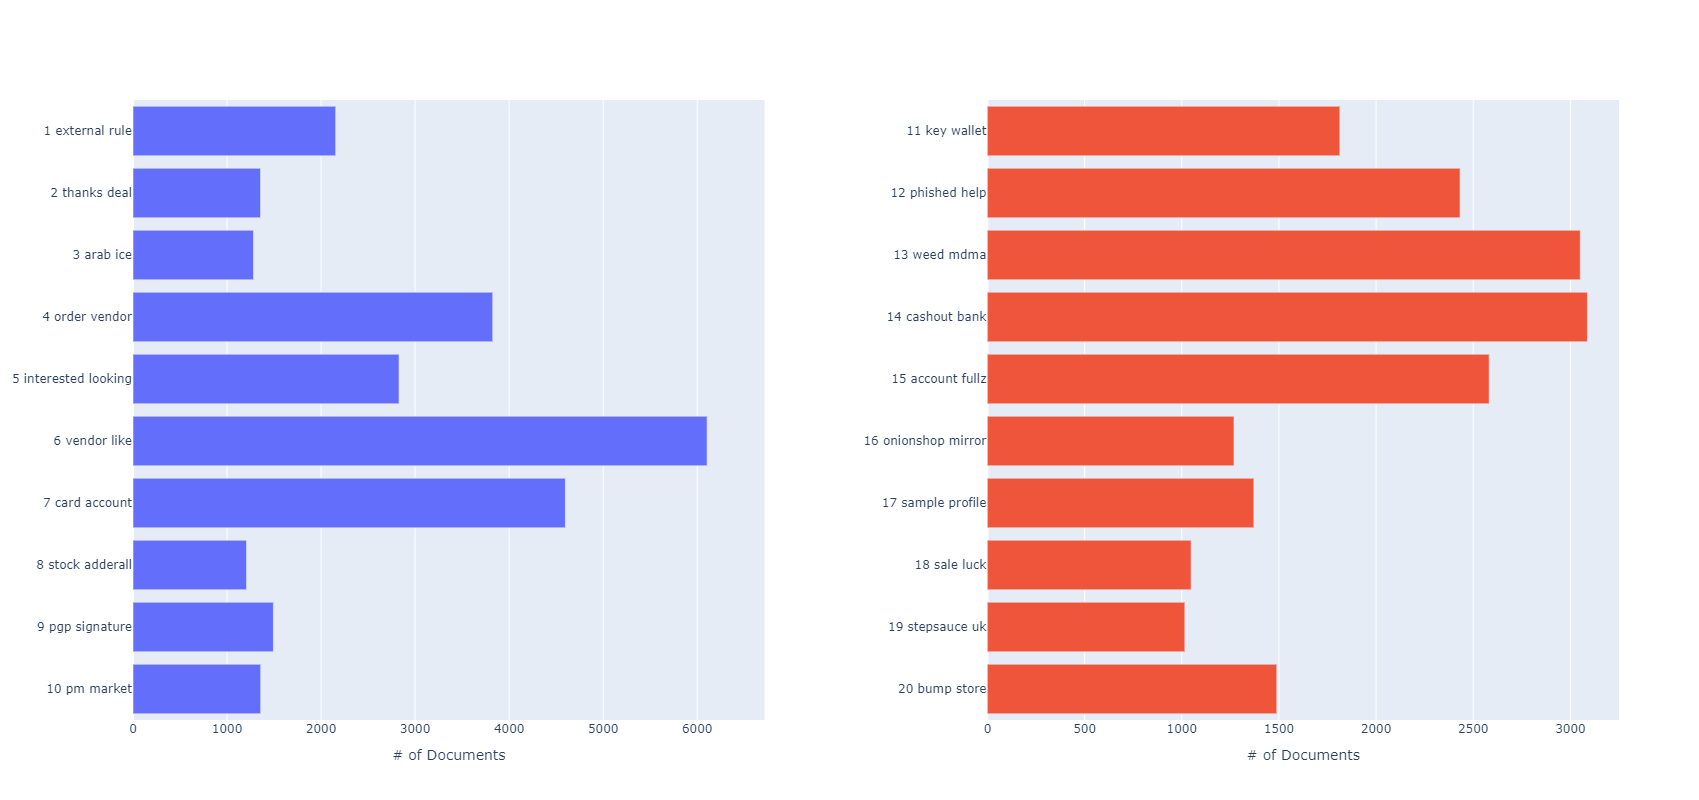

In [12]:
web_app_utils.plot_lda_components_distribution(lda_model_tfidf, vect_tfidf, lda_output_tfidf, n_topics)

In [13]:
lda_utils.print_topics(lda_model_tfidf, vect_tfidf, 10)


Topic #0:
external rule allowed contact link phished help read wsm vendor

Topic #1:
thanks deal existence rebellion unfree dabbingtimes become act dude absolutely

Topic #2:
arab ice sand nun consider smashed drug testicle eskimo lol

Topic #3:
order vendor dispute note wrote review day time good back

Topic #4:
interested looking jabber drop wrote paypal picsou know let anyone

Topic #5:
vendor like wrote know people market time good forum need

Topic #6:
card account need know wrote use method like phone good

Topic #7:
stock adderall interested pill offer suboxone ship limited price look

Topic #8:
pgp signature begin message end signed hash version gnupg key

Topic #9:
pm market icepapi name send wrote ranking edible alphabays sent

Topic #10:
key wallet pgp tail message click monero using address use

Topic #11:
phished help rule wsm welcome moved bro broder boat wrote

Topic #12:
weed mdma profile cocaine quality italian shipping order gram price

Topic #13:
cashout bank guide 

C:\Users\morga\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [14]:
doc_term_matrix = np.matrix(lda_model_tfidf.components_)
pyLDAvis.sklearn.prepare(lda_model_tfidf, doc_term_matrix, vect_tfidf)

C:\Users\morga\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.146771  0.005644       1        1  19.808551
6      0.173382 -0.007082       2        1  13.608031
3      0.152613  0.034970       3        1   9.274919
13     0.155239 -0.010347       4        1   8.329697
12     0.052404 -0.109054       5        1   7.950847
14     0.144140 -0.024187       6        1   5.576975
4      0.138108  0.037033       7        1   4.650251
11    -0.050068  0.230999       8        1   4.177805
0     -0.073064  0.248297       9        1   3.803486
10     0.059995  0.125982      10        1   3.541340
15    -0.038205 -0.120320      11        1   2.406698
8     -0.156896  0.161741      12        1   2.285907
1     -0.048529 -0.013548      13        1   2.235670
2     -0.033873 -0.070803      14        1   2.155355
16     0.004302 -0.090693      15        1   2.093581
7     -0.066265 -0.149358      16        1   2.052300
9      0.009422 -0.028843      17        1   1.817810
19    -0.312545 -0.015919      18        1   1.523666
18    -0.130580 -0.136558      19        1   1.472978
17    -0.126351 -0.067953      20        1   1.234134, topic_info=         Term         Freq        Total Category  logprob  loglift
1172     bump   817.000000   817.000000  Default  30.0000  30.0000
9861      wsm  1437.000000  1437.000000  Default  29.0000  29.0000
8382    store   755.000000   755.000000  Default  28.0000  28.0000
5337   market  1210.000000  1210.000000  Default  27.0000  27.0000
7590     rule  1080.000000  1080.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
9668  welcome    18.409323   328.948955  Topic20  -4.8714   1.5118
8382    store    20.009727   755.466723  Topic20  -4.7881   0.7637
9654     weed    17.142801   233.363094  Topic20  -4.9427   1.7838
8874     time    15.295078   477.936937  Topic20  -5.0568   0.9529
5337   market    14.420037  1210.726188  Topic20  -5.1157  -0.0356

[1313 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
6         5  0.963291         aaa
12       19  0.943744        aber
26        1  0.138299  absolutely
26        2  0.042553  absolutely
26        4  0.031915  absolutely
...     ...       ...         ...
9967      6  0.107934       zelle
9967      7  0.809501       zelle
9976      3  0.818170       zloty
9980     19  0.942979          zu
9991     14  0.799084        über

[4840 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 7, 4, 14, 13, 15, 5, 12, 1, 11, 16, 9, 2, 3, 17, 8, 10, 20, 19, 18])

In [15]:
# Log Likelihood: Higher the better
print('Log Likelihood: ', round(lda_model_tfidf.score(docs_vectorized_tfidf), 2))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print('Perplexity: ', round(lda_model_tfidf.perplexity(docs_vectorized_tfidf), 2))

# Model parameters
print(lda_model_tfidf.get_params())

C:\Users\morga\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Log Likelihood:  -1626964.13
Perplexity:  6699.37
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 25, 'mean_change_tol': 0.001, 'n_components': 20, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 3, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


---
## Design for Web App